# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

### Business Goal: 
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.



## Importing the required libraries

In [364]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')
import warnings
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import plotly as plotly
import plotly.offline
import plotly.graph_objs as go

In [365]:
import plotly.express as px

In [366]:
plotly.offline.init_notebook_mode()

## Step 1: Reading and Understanding the Data

In [367]:
data=pd.read_csv("day.csv")

In [368]:
data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [369]:
# Checking existence of null value in the dataset

data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [370]:
data.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

### Let's convert the data types

In [371]:
data['dteday'] =  pd.to_datetime(data['dteday'],format='%d-%m-%Y')

In [372]:
# Some columns need to be deleted because they are ambiguous and add no importance to the analysis

data = data.drop(['instant','yr','mnth'], axis=1)


### Extracting year and month from the date column for further analysis

In [373]:
data['year'] = pd.DatetimeIndex(data['dteday']).year
data['month'] = pd.DatetimeIndex(data['dteday']).month


In [374]:
# Some columns need to be deleted because they are ambiguous and add no importance to the analysis

data = data.drop(['dteday'], axis=1)


In [375]:
# renaming the columns for better understanding
data.rename(columns={'weathersit':'weather',
                     'hum': 'humidity',
                     'cnt':'count'},inplace=True)

In [376]:
# Checking data type for each column

data.dtypes

season          int64
holiday         int64
weekday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
year            int64
month           int64
dtype: object

### There are some data types that need to be corrected

In [377]:
data["year"]=data["year"].astype("category")
data["season"]=data["season"].astype("category")
data["month"]=data["month"].astype("category")
data["holiday"]=data["holiday"].astype("category")
data["weekday"]=data["weekday"].astype("category")
data["weather"]=data["weather"].astype("category")
data["workingday"]=data["workingday"].astype("category")

### checking all the data types

In [378]:
data.dtypes

season        category
holiday       category
weekday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
count            int64
year          category
month         category
dtype: object

In [379]:
data.head()

season holiday weekday workingday weather       temp     atemp  humidity  \
0      1       0       6          0       2  14.110847  18.18125   80.5833   
1      1       0       0          0       2  14.902598  17.68695   69.6087   
2      1       0       1          1       1   8.050924   9.47025   43.7273   
3      1       0       2          1       1   8.200000  10.60610   59.0435   
4      1       0       3          1       1   9.305237  11.46350   43.6957   

   windspeed  casual  registered  count  year month  
0  10.749882     331         654    985  2018     1  
1  16.652113     131         670    801  2018     1  
2  16.636703     120        1229   1349  2018     1  
3  10.739832     108        1454   1562  2018     1  
4  12.522300      82        1518   1600  2018     1

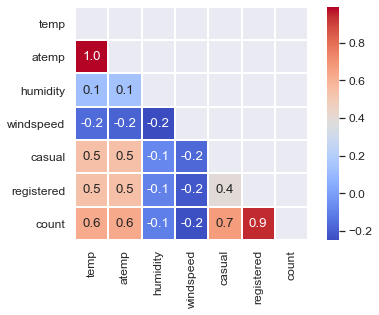

In [380]:
# heatmap for the dataset
sns.set(font_scale=1.1)
correlation_train = data.corr()
mask = np.triu(correlation_train.corr())

sns.heatmap(correlation_train,annot=True,fmt='.1f',cmap='coolwarm',square=True,mask=mask,linewidths=1)

plt.show()

## Step 2: Encoding the Labels & Visualization

### 1) season
- 1 : spring
- 2 : summer
- 3 : fall
- 4 : winter

In [381]:
codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
data['season'] = data['season'].map(codes)

In [382]:
fig=px.bar(data,x="season",y="count",color="season",title="season vs Count")
fig.show()

- Bike Rentals are more during the Fall(Monsoon) season.

### 2) weathersit
- 1 : Clear, Few clouds, Partly cloudy, Partly cloudy
- 2 : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3 : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4 : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


In [383]:
codes = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
data['weather'] = data['weather'].map(codes)


In [384]:
fig=px.bar(data,x="weather",y="count",color="weather",title="Weather vs Count")
fig.show()

- Bikes seem to be rented more in Partly cloudy weather.

### 3) workingday
- if day is neither weekend nor holiday is 1,
- otherwise is 0

In [385]:
codes = {1:'working_day',0:'Holiday'}
data['workingday'] = data['workingday'].map(codes)

In [386]:
fig=px.bar(data,x="workingday",y="count",color="workingday",title="working_day vs Count")
fig.show()

- Bikes seem to be rented more on working days.

### 4) year
- 2018:0
- 2019:1

In [387]:
fig=px.bar(data,x="year",y="count",color="year",title="year vs Count")
fig.show()

- Bike Rental popularity has increased in 2019 when compared to 2018.


### 5) Month
- 1:Jan
- 2:Feb
- 3:Mar
- 4:Apr
- 5:May
- 6:June
- 7:July
- 8:Aug
- 9:Sep
- 10:Oct
- 11:Nov
- 12:Dec

In [388]:
codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
data['month'] = data['month'].map(codes)

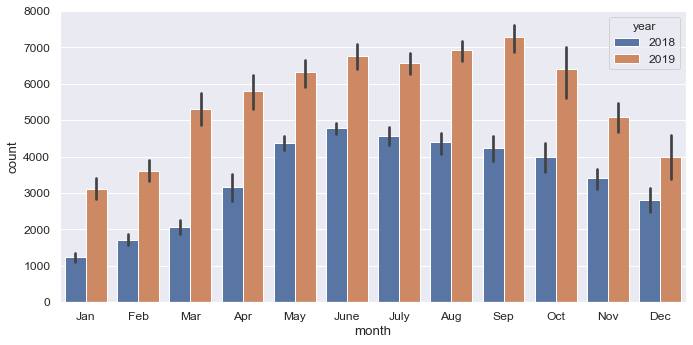

In [389]:
plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='year',data=data)


### 6) WeekDay:
- 0:Mon
- 1:Tue
- 2:Wed
- 3:Thu
- 4:Fri
- 5:Sat
- 6:Sun

In [390]:
codes = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['weekday'] = data['weekday'].map(codes)

In [391]:
fig=px.bar(data,x="weekday",y="count",color="weekday",title="weekday vs count")
fig.show()

- Bike Rentals are maximum on Sunday and Monday

## Step 3: Visualizing the Relationship among variables

### let's plot a regression plot for all numerical variables against the target variable

In [392]:
def srt_reg(y, df):
    fig, axes = plt.subplots(2,3, figsize=(15,10))
    axes = axes.flatten()

    for i, j in zip(df.select_dtypes(include=['number']).columns, axes):

        sns.regplot(x=i,
                    y=y,
                    data=df,
                    ax=j,
                    order=3,
                    ci=None,
                    color='#e74c3c',
                    line_kws={'color': 'black'},
                    scatter_kws={'alpha':0.4})
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=10))

        plt.tight_layout()

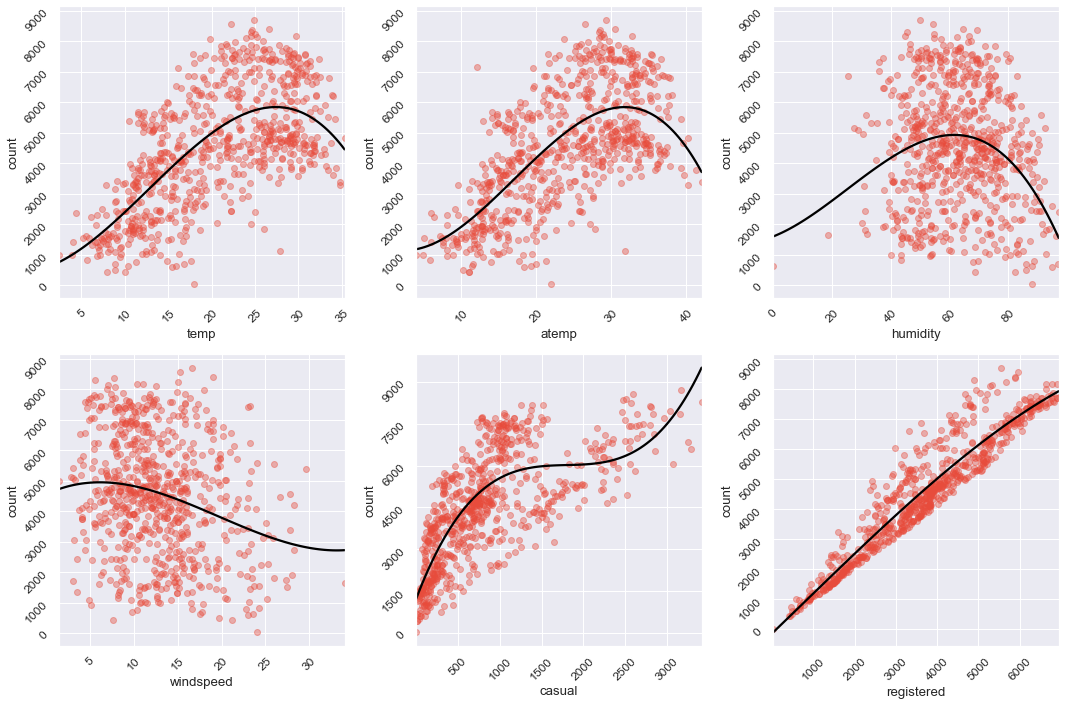

In [393]:
srt_reg("count", data)

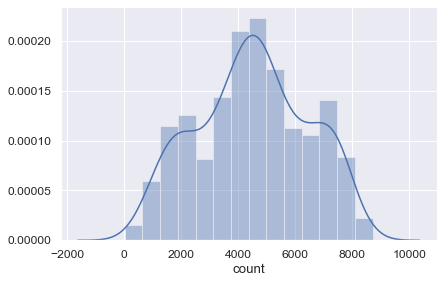

In [394]:
sns.distplot(data['count'])

- the target variable is normally distributed and isn't skewed

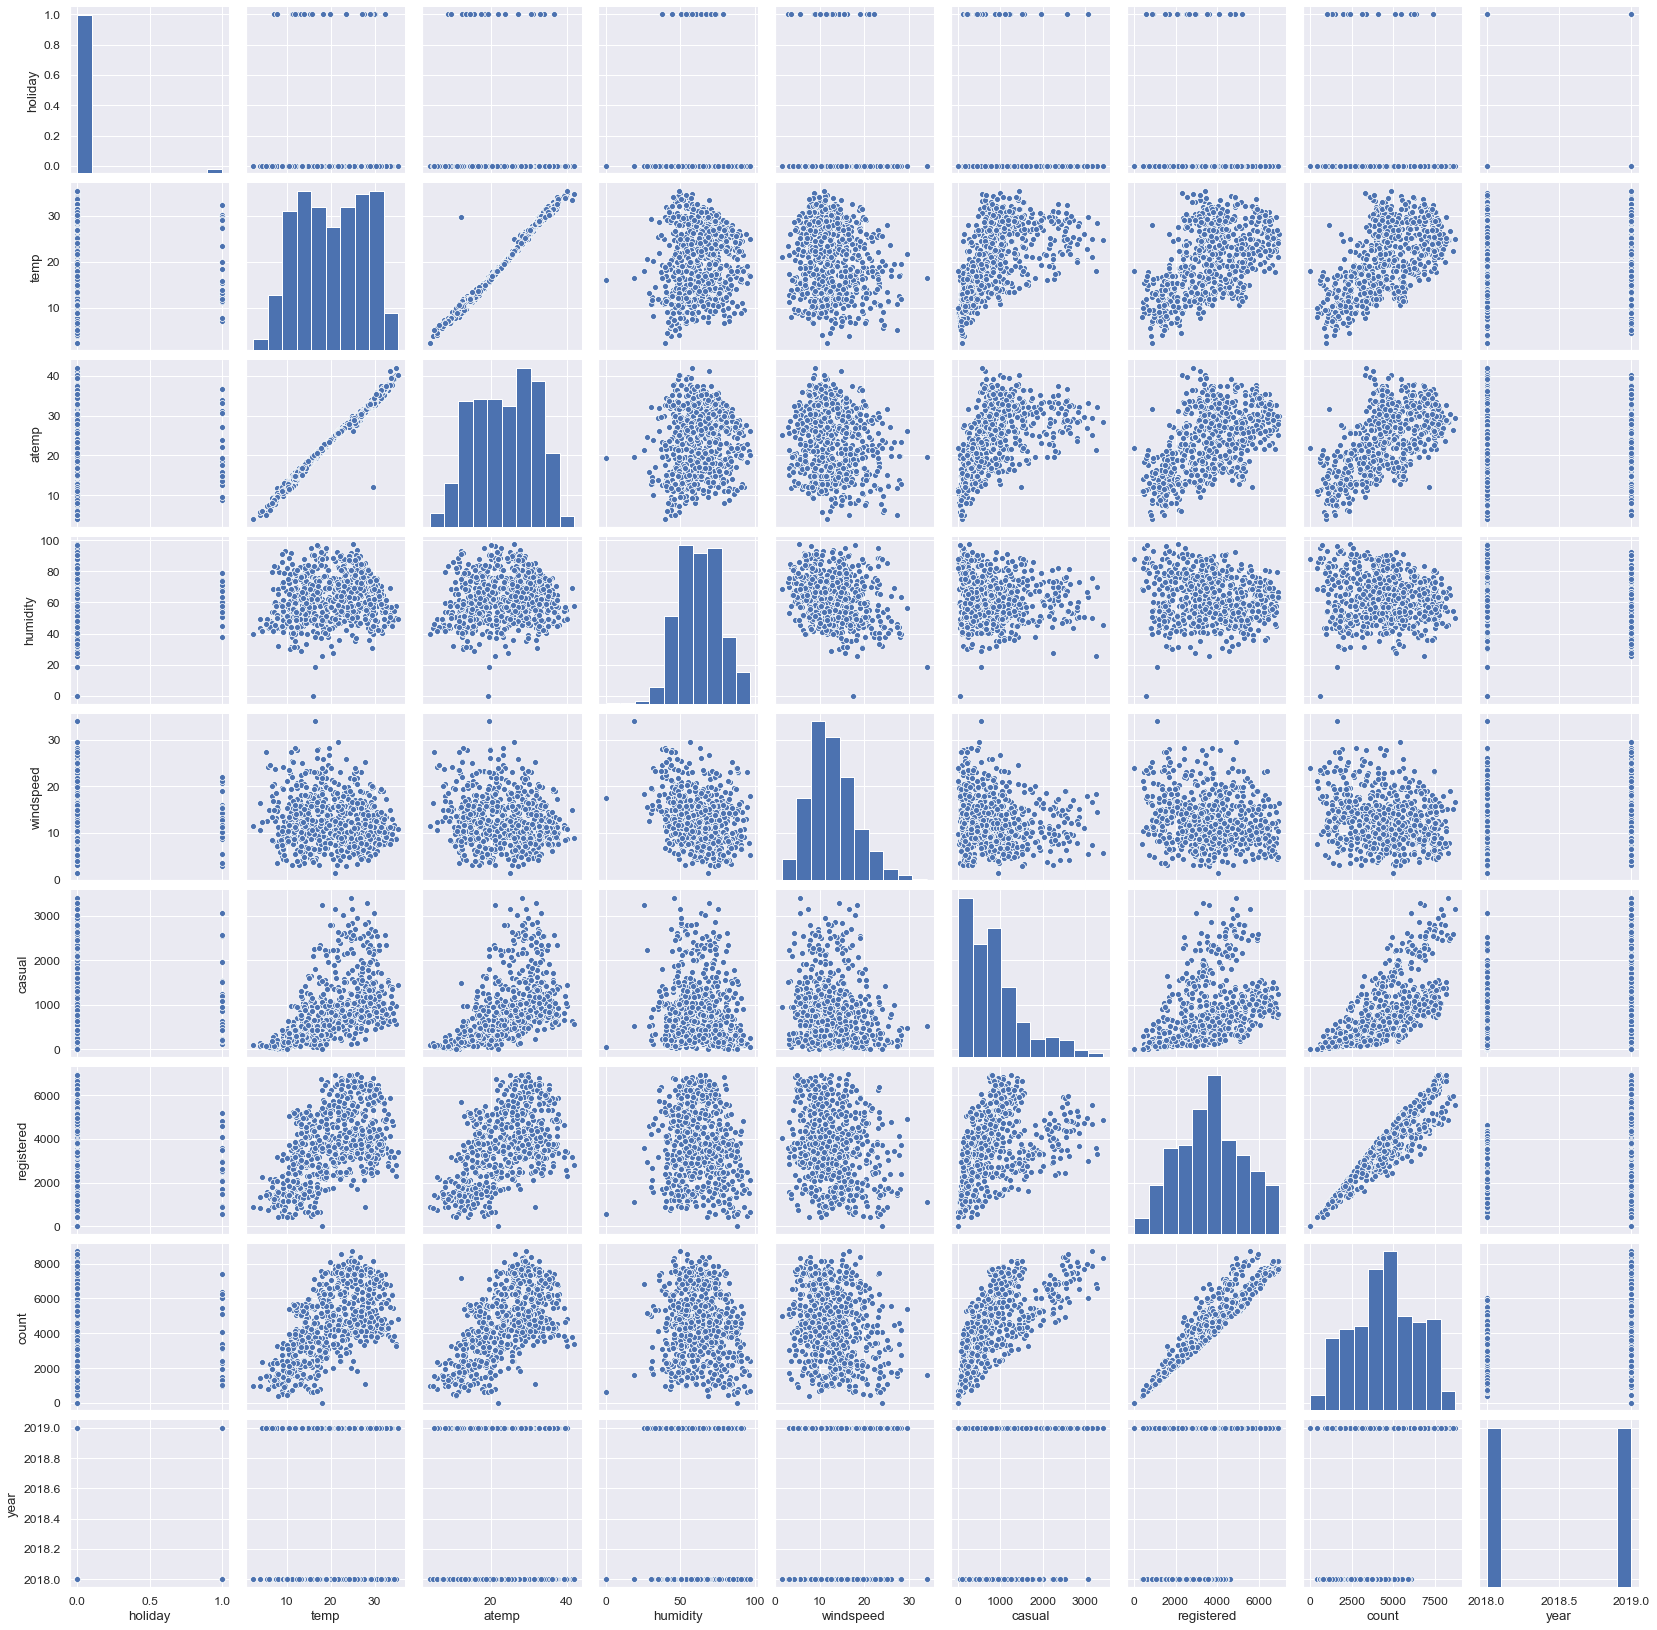

In [395]:
sns.pairplot(data)

## observations
- It is observed that atemp and temp are highly correlated and one can be dropped to avoid multicollinearity.
- 'count' variable is the decomposition of 'casual' and 'registered variable'. These 2 variables can be deleted
- 'windspeed' has not much correlation with 'count'. Can skip it too


In [396]:
# 'count' variable is the decomposition of 'casual' and 'registered variable'. These 2 variables can be deleted
# 'atemp' and 'temp' variables are similar almost. Can get rid of these
# 'windspeed' has not much correlation with 'count'. Can skip it too

data = data.drop(['atemp', 'casual', 'registered', 'windspeed'], axis=1)

## Step 4 : Creating dummy variables 

In [397]:
seasons = pd.get_dummies(data['season'],drop_first=True)

working_day = pd.get_dummies(data['workingday'],drop_first=True)

weather= pd.get_dummies(data['weather'],drop_first=True)

month= pd.get_dummies(data['month'],drop_first=True)

week_day= pd.get_dummies(data['weekday'],drop_first=True)

In [398]:
data= pd.concat([data,seasons,working_day,weather,month,week_day],axis=1)


In [399]:
# Dropping the categorical variables as they are already dummy-encoded.

data.drop(['season','workingday','weather','weekday','month'],axis=1,inplace=True)

In [400]:
data.head()

holiday       temp  humidity  count  year  summer  fall  winter  \
0       0  14.110847   80.5833    985  2018       0     0       0   
1       0  14.902598   69.6087    801  2018       0     0       0   
2       0   8.050924   43.7273   1349  2018       0     0       0   
3       0   8.200000   59.0435   1562  2018       0     0       0   
4       0   9.305237   43.6957   1600  2018       0     0       0   

   working_day  Mist  ...  Sep  Oct  Nov  Dec  Tue  Wed  Thu  Fri  Sat  Sun  
0            0     1  ...    0    0    0    0    0    0    0    0    0    1  
1            0     1  ...    0    0    0    0    0    0    0    0    0    0  
2            1     0  ...    0    0    0    0    1    0    0    0    0    0  
3            1     0  ...    0    0    0    0    0    1    0    0    0    0  
4            1     0  ...    0    0    0    0    0    0    1    0    0    0  

[5 rows x 28 columns]

## Step 5: Splitting the Data into Training and Testing Sets

In [401]:
from sklearn.model_selection import train_test_split

In [402]:
np.random.seed(0)

In [403]:
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

In [404]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [405]:
# Apply scaler() to all the columns except the'dummy' variables.

num_vars=['temp','humidity','count']

df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

<ipython-input-405-c6d2fd364cc8>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/nikil/Desktop/kaggle/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Dividing into X and Y sets for the model building

In [406]:
y_train = df_train.pop('count')
X_train = df_train

## Step 6: Building a linear model


### Using Recursive feature elimination(RFE) for automated Feature Selection approach

In [407]:
# Importing RFE and LinearRegression


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [408]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [409]:
X_train.shape

(510, 27)

In [410]:
# Running RFE with the output number of the variable equal to 13
rfe=RFE(lm,13)
rfe=rfe.fit(X_train,y_train)

/Users/nikil/Desktop/kaggle/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning:

Pass n_features_to_select=13 as keyword args. From version 0.25 passing these as positional arguments will result in an error



In [411]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('temp', True, 1),
 ('humidity', False, 10),
 ('year', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('working_day', True, 1),
 ('Mist', True, 1),
 ('Light Snow', True, 1),
 ('Feb', False, 7),
 ('Mar', False, 3),
 ('Apr', False, 5),
 ('May', False, 2),
 ('June', False, 4),
 ('July', False, 6),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 14),
 ('Dec', False, 12),
 ('Tue', False, 8),
 ('Wed', False, 9),
 ('Thu', False, 13),
 ('Fri', False, 15),
 ('Sat', False, 11),
 ('Sun', True, 1)]

In [412]:
col=X_train.columns[rfe.support_]
col

Index(['holiday', 'temp', 'year', 'summer', 'fall', 'winter', 'working_day',
       'Mist', 'Light Snow', 'Aug', 'Sep', 'Oct', 'Sun'],
      dtype='object')

In [413]:
X_train_rfe=X_train[col]

In [414]:
import statsmodels.api as sm

In [415]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [416]:
lm = sm.OLS(y_train,X_train_rfe.astype(float)).fit()

In [417]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     187.8
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          5.50e-182
Time:                        13:22:59   Log-Likelihood:                -270.12
No. Observations:                 510   AIC:                             568.2
Df Residuals:                     496   BIC:                             627.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2095.6435     75.328    -27.820      0.000   -2243.644   -1947.643
holiday        -0.2482      0.126     -1.966      0.050      -0.496      -0.000
temp            0.4779      0.034     13.870      0.000       0.410       0.546
year            1.0380      0.037     27.816      0.000       0.965       1.111
summer          0.5336      0.069      7.727      0.000       0.398       0.669
fall            0.2261      0.102      2.220      0.027       0.026       0.426
winter          0.6725      0.062     10.827      0.000       0.550       0.795
working_day     0.2148      0.054      3.977      0.000       0.109       0.321
Mist           -0.3716      0.040     -9.308      0.000      -0.450      -0.293
Light Snow     -1.3867      0.112    -12.330      0.000      -1.608      -1.166
Aug             0.1945      0.081      2.401      0.017       0.035       0.354
Sep             0.5031      0.080      6.327      0.000       0.347       0.659
Oct             0.1697      0.081      2.097      0.037       0.011       0.329
Sun             0.2474      0.068      3.643      0.000       0.114       0.381
==============================================================================
Omnibus:                       84.596   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.478
Skew:                          -0.774   Prob(JB):                     7.45e-57
Kurtosis:                       6.125   Cond. No.                     8.24e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## observations
- we have R-squared value equal to 0.831 and the p-values less than 0.05
- we are good to go and implement the same on our test set

## Step 7: Residual Analysis of the train data

In [418]:
X_train_new= X_train_rfe.drop('const',axis=1)

In [419]:
y_train_pred = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

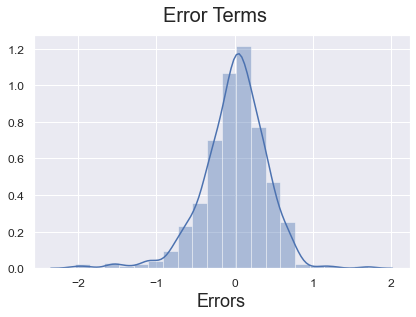

In [420]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     


- the residual errors are centered around the mean

## Step 8: Making Predictions

In [421]:
num_vars=['temp','humidity','count']

df_test[num_vars]= scaler.transform(df_test[num_vars])

<ipython-input-421-f2c69642dd31>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/nikil/Desktop/kaggle/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Dividing into X_test and y_test

In [422]:
y_test = df_test.pop('count')
X_test = df_test

In [423]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

In [424]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

## Step 9: Model Evaluation

In [425]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

In [426]:
fig=px.scatter(x=y_test,y=y_test_pred,title="Actual vs Predictions")
fig.show()

In [427]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8154306566334281

# Conclusion

The R-Squared came out to be 0.8154. This means our model is performing well on the test data set